# Signal and Event Analysis

In this part we show basic analysis of the DAS waveforms.

## Phase Following

Follow a coherent phase through a DAS section.

We can laverage the spatial coherency of a DAS data set and follow the onset of a phase through iterative cross-correlation of neighboring traces. The principle workflow is:

1. Get windowed root pick template.
2. Calculate normalized cross correlate with downwards neighbor.
3. Evaluate maximum cross-correlation in allowed window (`max_shift`).
4. Update template trace and go to 2.

5. Repeat for upward neighbors.

## Example 1 - Drop weight vsp-shot

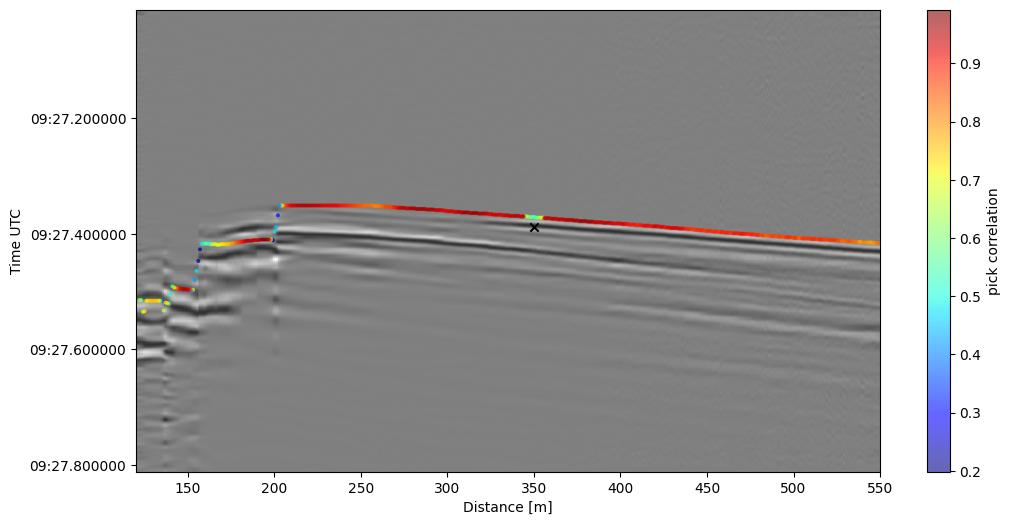

In [55]:
%config InlineBackend.figure_format = 'jpg'
import matplotlib.pyplot as plt
from datetime import timedelta
from lightguide.client import ExampleData

# This will download example data
blast = ExampleData.vsp_shot()

# Pre-Processing
blast = blast.trim_channels(begin=120, end=550)
blast = blast.trim_time(begin=1.7, end=2.5)
blast.lowpass(70.0)
blast.afk_filter()

pick_time = blast.start_time + timedelta(seconds=0.377)
pick_channel = 350

# Follow the phase from initial pick
picks = blast.follow_phase(
    pick_time,
    pick_channel,
    window_size=80,
    max_shift=20,
    threshold=1e-3,
    template_stacks=6,
)

fig = plt.figure(figsize=(12, 6))
ax = fig.gca()

blast.plot(axes=ax, cmap="binary", show_date=True)
sc = ax.scatter(picks.channel, picks.time, s=4,c=picks.correlation, cmap="jet", alpha=0.6)
cbar = plt.colorbar(sc)
cbar.set_label("pick correlation")
# # Plot initial pick
ax.scatter(pick_channel, pick_time, marker="x", c="k");

Save picks to a pyrocko markerfile...


In [5]:
filename = 'markers_VSP-DAS-G1-120.txt'
picks.save_picks(filename=filename)

## Example 2 - Icequake

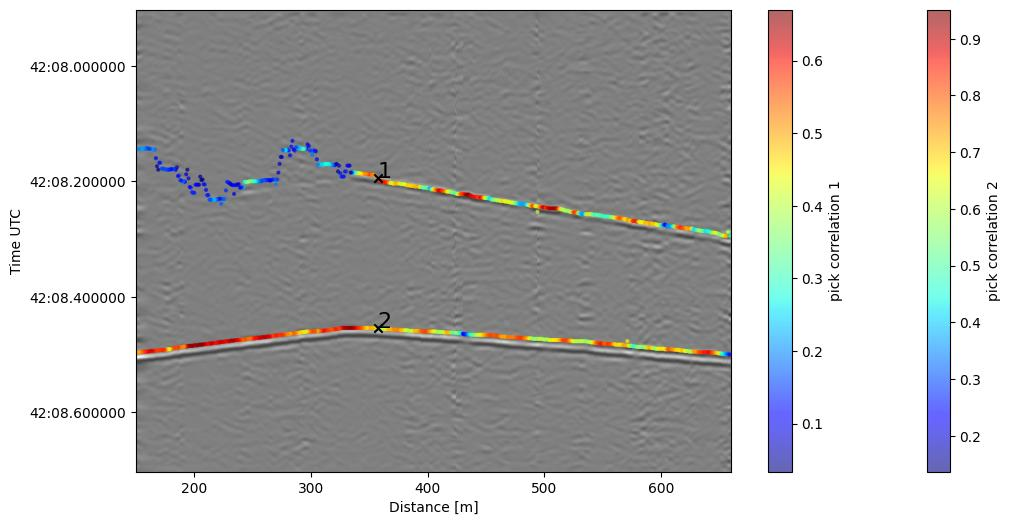

In [52]:
from lightguide.client import ExampleData
from datetime import timedelta
import matplotlib.pyplot as plt

# (down)load data
blast = ExampleData.icequake()

# Pre-Processing
blast = blast.trim_channels(begin=150, end=660)
blast = blast.trim_time(begin=0,end=0.8)
blast.lowpass(70.0)
blast.afk_filter()

pick_time1 = blast.start_time + timedelta(seconds=0.291)
pick_time2 = blast.start_time + timedelta(seconds=0.551)

pick_channel = 357
template_stacks = 8

# Follow the phase from initial pick
picks1 = blast.follow_phase(
    pick_time=pick_time1,
    pick_channel=pick_channel,
    window_size=50,
    max_shift=15,
    threshold=1e-8,
    template_stacks=template_stacks,
)

picks2 = blast.follow_phase(
    pick_time=pick_time2,
    pick_channel=pick_channel,
    window_size=50,
    max_shift=10,
    threshold=1e-8,
    template_stacks=template_stacks,
)

fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
blast.plot(axes=ax, cmap="binary", show_date=True)
sc1 = ax.scatter(picks1.channel, picks1.time, s=4,c=picks1.correlation, cmap="jet", alpha=0.6)
sc2 = ax.scatter(picks2.channel, picks2.time, s=4,c=picks2.correlation, cmap="jet", alpha=0.6)
cbar = plt.colorbar(sc2)
cbar.set_label("pick correlation 2")
cbar = plt.colorbar(sc1)
cbar.set_label("pick correlation 1")
# Plot initial pick
ax.scatter(pick_channel, pick_time1, marker="x", c="k"),ax.text(pick_channel, pick_time1,'1',size=16,c="k")
ax.scatter(pick_channel, pick_time2, marker="x", c="k"),ax.text(pick_channel, pick_time2,'2',size=16,c="k");